In [1]:
import scanpy as sc
from  os.path import join
import sys
import os
lib = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities\droplet_dataset'
lib2 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities'
lib3 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\data_analysis'
lib4 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy'
lib5 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\scripts'
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)
sys.path.append(lib5)
import os
from os.path import join
import sklearn
from droplet_dataset import *
from utilities import *
from matplotlib import pyplot
import numpy as np
import scipy
import pickle
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import random
from scipy.stats import pearsonr
from matplotlib.pyplot import figure
from termcolor import colored
import tables



In [150]:
path = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\update_runs\4.3.21'
sample_id = 'M104.pkl'


In [151]:
# from utilities.droplet_dataset import loading_sample

sample = pickle.load(open(join(path, sample_id), 'rb'))

In [157]:
sample[2]

['ENSG00000243485',
 'ENSG00000238009',
 'ENSG00000237683',
 'ENSG00000228463',
 'ENSG00000237094',
 'ENSG00000236743',
 'ENSG00000231709',
 'ENSG00000239664',
 'ENSG00000230021',
 'ENSG00000235373',
 'ENSG00000228327',
 'ENSG00000237491',
 'ENSG00000177757',
 'ENSG00000225880',
 'ENSG00000230368',
 'ENSG00000272438',
 'ENSG00000230699',
 'ENSG00000241180',
 'ENSG00000223764',
 'ENSG00000187634',
 'ENSG00000188976',
 'ENSG00000187961',
 'ENSG00000187583',
 'ENSG00000187642',
 'ENSG00000272512',
 'ENSG00000188290',
 'ENSG00000224969',
 'ENSG00000187608',
 'ENSG00000188157',
 'ENSG00000273443',
 'ENSG00000237330',
 'ENSG00000131591',
 'ENSG00000223823',
 'ENSG00000272141',
 'ENSG00000205231',
 'ENSG00000186891',
 'ENSG00000186827',
 'ENSG00000078808',
 'ENSG00000176022',
 'ENSG00000184163',
 'ENSG00000260179',
 'ENSG00000160087',
 'ENSG00000230415',
 'ENSG00000162572',
 'ENSG00000131584',
 'ENSG00000169972',
 'ENSG00000127054',
 'ENSG00000224051',
 'ENSG00000169962',
 'ENSG00000107404',


# number of mitochondria reads vs. number of reads

count shape (5981, 23986)


<IPython.core.display.Javascript object>


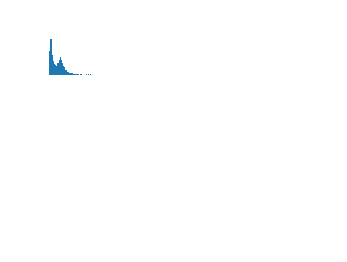

num of mitochondria genes 13
mitochondria genes ['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB']
pearson correlation  (0.8175328673698923, 0.0)
counting_reads shape  (5981,)
counting_reads shape  (5981,)
number of cell having more than 0.7 mitochondria genes: 125


In [5]:
sample_id = 'M130'
sample = fr'C:\Users\itay\Desktop\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\Data\rna_seq200k\all_samples\{sample_id}\RNA_sample.pkl'
data = pickle.load(open(sample, 'rb'))
genes = data.gene_names
counts = data.counts.T
print(f'count shape {counts.shape}')

fig, axs = plt.subplots(4, 2)

counting_reads = counts.sum(axis=1)
mitochondria_genes = counts[:, [s.startswith('MT-') for s in genes]].sum(axis=1)
mit = [s for s in genes if s.startswith('MT-')]
print(f'num of mitochondria genes {len(mit)}')
print(f'mitochondria genes {mit}')
print(f'pearson correlation  {pearsonr(counting_reads, mitochondria_genes)}')
print(f'counting_reads shape  {counting_reads.shape}')
print(f'counting_reads shape  {mitochondria_genes.shape}')



# plot 1 - cell reads intensity
axs[0, 0].hist(counting_reads, bins=150)
axs[0, 0].set_title("cell reads intensity")
axs[0, 0].set_ylabel('number of reads')
axs[0, 0].set_xlabel('indexes')



# plot 2
axs[0, 1].hist(mitochondria_genes, bins=100)
axs[0, 1].set_title("mitochondria reads intensity")
axs[0, 1].set_ylabel('number of reads')
axs[0, 1].set_xlabel('indexes')



# plot 3
axs[1, 0].plot(mitochondria_genes, counting_reads, 'ro')
axs[1, 0].set_title("reads intensity X mitochondria reads intensity")
axs[1, 0].set_xlabel('number of mitochondria reads')
axs[1, 0].set_ylabel('number of reads')


# plot 4
rand = random.choices(range(len(counting_reads)), k=300)
axs[1, 1].plot(mitochondria_genes[rand], counting_reads[rand], 'ro')
axs[1, 1].set_title("reads intensity X mitochondria reads intensity")
axs[1, 1].set_xlabel('number of mitochondria reads')
axs[1, 1].set_ylabel('number of reads')



# plot 5
indexes = np.where(counting_reads<8000)
counting_reads_small = counting_reads[indexes]
mitochondria_genes_small = mitochondria_genes[indexes]
axs[2, 0].plot(mitochondria_genes_small, counting_reads_small, 'ro')
axs[2, 0].set_title("reads intensity X mitochondria reads intensity")
axs[2, 0].set_xlabel('number of mitochondria reads')
axs[2, 0].set_ylabel('number of reads')


# plot 6
indexes = np.where(counting_reads<2000)
rand = random.choices(range(len(sum(indexes))), k=300)
counting_reads_small = counting_reads[indexes][rand]
mitochondria_genes_small = mitochondria_genes[indexes][rand]
axs[2, 1].plot(mitochondria_genes_small, counting_reads_small, 'ro')
axs[2, 1].set_title("reads intensity X mitochondria reads intensity")
axs[2, 1].set_xlabel('number of mitochondria reads')
axs[2, 1].set_ylabel('number of reads')



# plot 7
# indexes = np.where(counting_reads<1000)
counting_reads = counting_reads.astype(np.float64)
mitochondria_genes = mitochondria_genes.astype(np.float64)
res = np.divide(mitochondria_genes, counting_reads, out=np.zeros_like(counting_reads), where=counting_reads!=0)
axs[3, 0].hist(res, bins=40)
axs[3, 0].set_title("retion reads & mitochondria reads")



# plot 8
ratio_of_interest = 0.7
indexes = np.where(res>ratio_of_interest)
axs[3, 1].plot(mitochondria_genes[indexes], counting_reads[indexes], 'ro')
axs[3, 1].set_title(f"ratio higher than {ratio_of_interest}")
axs[3, 1].set_xlabel('number of mitochondria reads')
axs[3, 1].set_ylabel('number of reads')
print(f'number of cell having more than {ratio_of_interest} mitochondria genes: {len(mitochondria_genes[indexes])}')



# number of mitochondria reads vs. number of reads

In [ ]:
import scipy.stats as stats

oddsratio, pvalue = stats.fisher_exact([[7, 2], [2, 7]])
pvalue

In [ ]:
# sample_id = 'M110'
sample = r'D:\Technion studies\Keren Laboratory\Data\droplet_seq\Cohort\cohort_all_samples_3.2.21.pkl'
data = pickle.load(open(sample, 'rb'))
genes = data.gene_names
counts = data.counts

In [51]:
cls1 = random.sample(range(data.number_of_cells), k = int(data.number_of_cells/2))
cls2 = [ii for ii in range(data.number_of_cells) if not ii in cls1]

In [70]:
gene_idx = data.gene_names.index('CD3E')
gene_cls1 = data.counts[cls1, gene_idx]
gene_cls2 = data.counts[cls2, gene_idx]


In [80]:
sum(gene_cls1>1)
sum(gene_cls2>1)
# len(gene_cls1)

oddsratio, pvalue = stats.fisher_exact([[sum(gene_cls1>1), sum(gene_cls2>1)], 
                                        [len(gene_cls1), len(gene_cls2)]])
pvalue

0.8606385214395829

In [88]:
t_cell_indices = [idx for idx, cell_type_list in enumerate(data.cells_information.getattr('cell_type_list')) if 'T cells' in cell_type_list]
not_t_cell_indices = [idx for idx in range(data.number_of_cells) if not idx in t_cell_indices]

In [139]:
gene_idx = data.gene_names.index('CD3E')
gene_cls1 = data.counts[t_cell_indices, gene_idx]
gene_cls2 = data.counts[not_t_cell_indices, gene_idx]

oddsratio, pvalue = stats.fisher_exact([[sum(gene_cls1>1), sum(gene_cls2>1)], 
                                        [len(gene_cls1), len(gene_cls2)]])
pvalue

0.0

In [137]:
print([[sum(gene_cls1>1), sum(gene_cls2>1)], 
                                        [len(gene_cls1), len(gene_cls2)]])


[[960, 255], [964, 257]]


In [96]:
sum([not 'T cells' in ii for ii in data[t_cell_indices].cells_information.getattr('cell_type_list')])

0

In [17]:
# dd = data[not_t_cell_indices][(gene_cls2>1).tolist()]

def print_c(c_inf):
    print(f'cell_type_list: {c_inf.cell_type_list}')
    print(f'conflict_related_cell_types: {c_inf.conflict_related_cell_types}')
    print(f'is_apoptosis: {c_inf.is_apoptosis}')
    print(f'is_immune: {c_inf.is_immune}')
    print(f'is_cancer: {c_inf.is_cancer}')
    print(f'cancer_immune_conflict: {c_inf.cancer_immune_conflict}')
    print(f'is_doublet: {c_inf.is_doublet}')
    print(f'is_lymphoid: {c_inf.is_lymphoid}')
    print(f'is_myeloid: {c_inf.is_myeloid}')
    print(f'is_stromal: {c_inf.is_stromal}')
#     print(f'inferCNV: {c_inf.inferCNV}')
    print(f'should_be_removed: {c_inf.should_be_removed}')
#     print(f'count_insertions: {c_inf.count_insertions}')
#     print(f'count_deletions: {c_inf.count_deletions}')


clusters = [random.choice([1,2,3]) for _ in range(10)]

clusters


[3, 2, 1, 1, 2, 3, 3, 3, 3, 3]

In [23]:
import statsmodels as sm
import scipy.stats as stats



percentage_voting_expression_in_clusters = []
p_values = [] # before correction
for cluster in list(set(clusters)):
    print(cluster)
    cluster_indices = [idx for idx, val in enumerate(clusters) if val==cluster]
    other_clusters_indices = [idx for idx, val in enumerate(clusters) if val!=cluster]
#     print(cls_indices)
    
    cluster_data = data[cluster_indices]
    other_clusters_data = data[other_clusters_indices]
    # statistical test for each gene
    for gene_idx in range(data.number_of_genes):
        cluster_gene_expression = cluster_data.counts[:, gene_idx] > 1
        other_clusters_gene_expression = other_clusters_data.counts[:, gene_idx] > 1
        
        number_of_cells_expressing_gene_in_cluster = sum(cluster_gene_expression)
        number_of_cells_expressing_gene_in_other_clusters = sum(other_clusters_gene_expression)
        
        n_cells_in_cluster = len(cluster_gene_expression)
        n_cells_in_other_clusters = len(other_clusters_gene_expression)
        
        oddsratio, pvalue = stats.fisher_exact([[number_of_cells_expressing_gene_in_cluster, 
                                                 number_of_cells_expressing_gene_in_other_clusters], 
                                        [n_cells_in_cluster, n_cells_in_other_clusters]])
        
        p_voting_expression_in_cluster = number_of_cells_expressing_gene_in_cluster / n_cells_in_cluster
        
        
        percentage_voting_expression_in_clusters.append(p_voting_expression_in_cluster)
        p_values.append(pvalue)
        

        
sm.stats.multitest.multipletests(p_values, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)

1
[2, 3]
2
[1, 4]
3
[0, 5, 6, 7, 8, 9]


In [62]:
# sample_id = 'M110'
sample = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\update_runs\21.2.21\M118.pkl'
rna_sample = pickle.load(open(sample, 'rb'))
_rna_sample = RNAseq_Sample(counts=rna_sample.counts, gene_names=rna_sample.gene_names, barcodes=rna_sample.barcodes, 
                        features=rna_sample.features, cells_information=rna_sample.cells_information)
rna_sample = _rna_sample 
print(rna_sample.number_of_cells)


rna_sample = rna_sample.filter_cells_by_property('should_be_removed', False)
rna_sample.normalize_data()
print(rna_sample.number_of_cells)

# genes = data.gene_names
# counts = data.counts

1687
1301


In [63]:
rna_sample = rna_sample.filter_cells_by_property('is_immune', True)
print(rna_sample.number_of_cells)
print(rna_sample.counts.shape)
rna_sample.filter_genes_by_variance(6)
print(rna_sample.counts.shape)

876
(876, 20194)
Dataset was cleared from genes with variance of less than 6
(876, 6)


In [64]:
# coloring by is_myeloid and is_lymphoid
is_m = rna_sample.cells_information.getattr('is_myeloid')
is_l = rna_sample.cells_information.getattr('is_lymphoid')
colors = []
for i in range(rna_sample.number_of_cells):
    if rna_sample[i][1].is_lymphoid:
        colors.append(0)
    elif rna_sample[i][1].is_myeloid:
        colors.append(1)
    else:
        colors.append(2)

(876, 2)


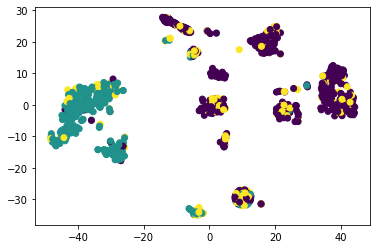

In [65]:
cells_embedded = TSNE(n_components=2, random_state=21).fit_transform(rna_sample.counts)
print(cells_embedded.shape)
plt.scatter(cells_embedded[:, 0], cells_embedded[:, 1], c=colors)

In [138]:
# coloring by is_myeloid and is_lymphoid
cell_types = rna_sample.cells_information.getattr('cell_type_list')
colors = []
for i in cell_types:
    if 'T cells' in i:
        colors.append('T cells')
    else:
        colors.append('not T cells')
# plt.scatter(cells_embedded[:, 0], cells_embedded[:, 1], c=colors, edgecolors='none')


(876,)
(876, 2)


<AxesSubplot:xlabel='X', ylabel='Y'>

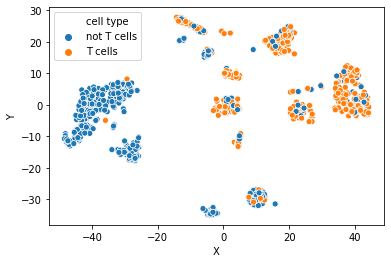

In [141]:
import seaborn as sns




# sns.scatterplot(x="gdpPercap", y="lifeExp",
#               hue="continent",
#               data=cells_embedded)



# sns.scatterplot(x=cells_embedded[:,0], y=cells_embedded[:,1])
# df = pd.DataFrame(np.concatenate([cells_embedded ,np.array(colors)[..., np.newaxis]], axis=1), columns=['X', 'Y', 'c'])
df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
df ["cell type"] = colors
print(np.array(colors).shape)
print(cells_embedded.shape)

# np.concatenate([cells_embedded ,np.array(colors)[..., np.newaxis]], axis=1)
sns.scatterplot(x="X", y="Y",
              hue="cell type",
              data=df)

Text(0.5, 0.98, 'Pokemon Stats by Generation')

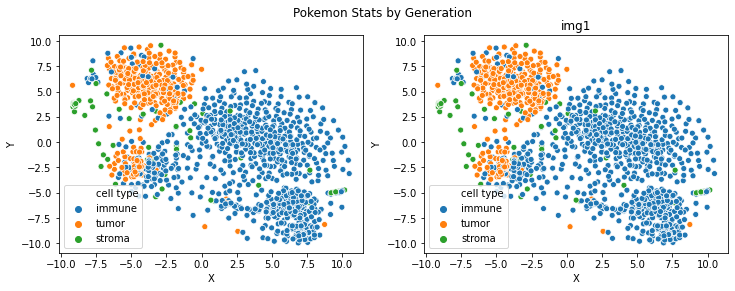

In [184]:
# df['d'] = colors
# df

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(ax=axes[0], x="X", y="Y",
              hue="cell type",
              data=df)
sns.scatterplot(ax=axes[1], x="X", y="Y",
              hue="cell type",
              data=df)
axes[1].set_title("img1")
fig.suptitle('Pokemon Stats by Generation')

In [197]:
aa = np.array([1,2,3])

In [199]:
bb = np.concatenate([aa, aa])

In [203]:
bb

array([1, 2, 3, 1, 2, 3])

In [155]:
# sample_id = 'M110'
sample = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\update_runs\21.2.21\M118.pkl'
rna_sample = pickle.load(open(sample, 'rb'))
_rna_sample = RNAseq_Sample(counts=rna_sample.counts, gene_names=rna_sample.gene_names, barcodes=rna_sample.barcodes, 
                        features=rna_sample.features, cells_information=rna_sample.cells_information)
rna_sample = _rna_sample 
print(rna_sample.number_of_cells)


rna_sample = rna_sample.filter_cells_by_property('should_be_removed', False)
rna_sample.normalize_data()
print(rna_sample.number_of_cells)


1687
1301


In [158]:
is_cancer = rna_sample.cells_information.getattr('is_cancer')
is_stroma = rna_sample.cells_information.getattr('is_stromal')
is_immune = rna_sample.cells_information.getattr('is_immune')


In [177]:
# coloring by is_myeloid and is_lymphoid

colors = []
print(rna_sample.number_of_cells)
for i in range(rna_sample.number_of_cells):
    if is_cancer[i]:
        colors.append("tumor")
    elif is_immune[i]:
        colors.append("immune")
    else:
        colors.append("stroma")


1301


In [2]:
# cells_embedded = TSNE(n_components=2, random_state=21).fit_transform(rna_sample.counts)
# df = pd.DataFrame(cells_embedded, columns=['X', 'Y'])
df["cell type"] = colors
print(np.array(colors).shape)
print(cells_embedded.shape)

# np.concatenate([cells_embedded ,np.array(colors)[..., np.newaxis]], axis=1)
sns.scatterplot(x="X", y="Y",
              hue="cell type", label="dd",
              data=df)

NameError: name 'colors' is not defined

876

In [ ]:
import statsmodels as sm
sm.stats.multitest.multipletests([0.01, 0.02, 0.04, 0.15], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)

In [3]:
sample_id = 'M109'

sample = fr'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\update_runs\21.2.21\{sample_id}.pkl'
data = pickle.load(open(sample, 'rb'))
genes = data.gene_names
counts = data.counts.T
print(f'count shape {counts.shape}')

count shape (21987, 7832)


In [22]:
data = data[[not aa for aa in data.cells_information.getattr('should_be_removed')]]
cc = data.cells_information.getattr('is_cancer')
mm = data.cells_information.getattr('is_immune')
ss = data.cells_information.getattr('is_stromal')
ind = [cc[ii] or mm[ii] or ss[ii] for ii in range(len(cc))]
sum(ind)/len(ind)
# ind

0.9953503819329127

In [54]:
data.counts.shape



(7832, 21987)

In [4]:
arr = data.counts.flatten()

In [6]:
arr2 = arr[arr!=0]

In [17]:
# print(arr.shape)
# print(arr2.shape)
# counts
# counts[np.argsort(counts)]
arr3 = np.log(arr2)

In [36]:
arr3[:10][np.argsort(arr3[:10])]
np.arange(arr3[:10].shape[0])


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

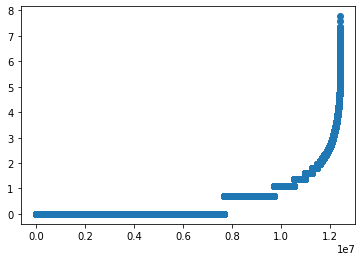

In [40]:
# print(data.counts.mean(axis=0).shape)
# counts, bins = np.histogram(arr2[:1000])
# plt.hist(bins[:-1], bins, weights=counts)
# np.argmax(data.counts)

plt.scatter(np.arange(arr3.shape[0]), arr3[np.argsort(arr3)])

10000.0


c:\users\itay\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log2
  


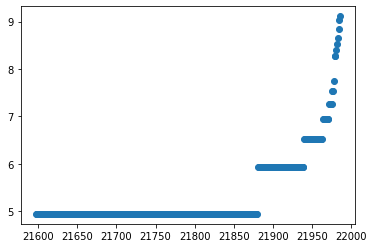

In [98]:
cell0 = data.counts[0]


cell0_sum = cell0.sum()
scalling_factor = cell0_sum/10000
print(cell0_sum/scalling_factor)

vv = np.log2(cell0/scalling_factor)+1
plt.scatter(np.arange(vv.shape[0]), vv[np.argsort(vv)])

In [99]:
from collections import Counter
Counter(vv)

Counter({-inf: 21597,
         4.941198646383814: 284,
         6.52616114710497: 24,
         5.941198646383814: 59,
         6.941198646383814: 8,
         8.40063026502111: 1,
         8.263126741271176: 2,
         9.111123647826126: 1,
         7.52616114710497: 2,
         7.263126741271177: 4,
         7.748553568441418: 1,
         8.52616114710497: 1,
         9.028661487634153: 1,
         8.641638364524905: 1,
         8.848089241992334: 1})

In [133]:


# Counter(normalized[1].tolist())

In [3]:

SAMPLES = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\update_runs\21.2.21'

In [4]:
sample_id = 'M97'

sample_path = os.path.join(SAMPLES, f'{sample_id}.pkl')
rna_sample = pickle.load(open(sample_path, 'rb'))
# Only because the samle had been saved in old version without one of the attributes.
_rna_sample = RNAseq_Sample(counts=rna_sample.counts, gene_names=rna_sample.gene_names, barcodes=rna_sample.barcodes, 
                        features=rna_sample.features, cells_information=rna_sample.cells_information)
rna_sample = _rna_sample 
print(f"Number of cells: {rna_sample.number_of_cells}")


rna_sample = rna_sample.filter_cells_by_property('should_be_removed', False)
rna_sample.normalize_data()
print(f"Number of cells after garbage has removed: {rna_sample.number_of_cells}")


Number of cells: 4296
Number of cells after garbage has removed: 3467


In [5]:
clusters = [random.choice([1,2,3]) for i in range(rna_sample.number_of_cells)]

In [6]:
cluster_samples = {}
for cluster_id in set(clusters):
    cluster_indices = [idx for idx, ii in enumerate(clusters) if ii==cluster_id]
    cluster_samples[cluster_id] = rna_sample[cluster_indices]

In [7]:
cluster_samples

{1: <droplet_dataset.RNAseq_Sample at 0x293f42eab00>,
 2: <droplet_dataset.RNAseq_Sample at 0x293a69a2630>,
 3: <droplet_dataset.RNAseq_Sample at 0x293a69a2828>}

In [13]:
list(rna_sample.get_statistics().values())[1]

,Immune_general,CD8 Cytotoxic T cells,Exhausted T cells,T cells,CD4 helper T cells,Neutrophils,myeloid cells_general_mature,cDCs_dendritic_cells,Granolocytes,Macrophage_mature,...,Terminal effector,Stem_like T cells,Memory T cells,Memory CD4 T cells,Memory CD8 T cells,Memory CD4_CD8 T cells,Macrophage_immature,Monocyte_immature,pDCs,myeloid cells_general_immature
count,1231.00,583.000,402.000,761.000,19.000,220.000,29.000,37.000,4.000,25.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
portion,0.96,0.455,0.314,0.594,0.015,0.172,0.023,0.029,0.003,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [263]:
cell_type_list = ['T cells', 'CD4 helper T cells', 'CD8 Cytotoxic T cells', 'Regulatory T cells', 'Regulatory CD4 T cells', 'Regulatory CD8 T cells', 'Regulatory CD4_CD8 T cells', 'NKT cells', 'NK cells', 'B cells', 'Activated T cells', 'Senescence T cells', 'Terminal effector', 'Exhausted T cells', 'Stem_like T cells', 'Memory T cells', 'Memory CD4 T cells', 'Memory CD8 T cells', 'Memory CD4_CD8 T cells', 'Macrophage_immature', 'Macrophage_mature', 'Monocyte_immature', 'Monocyte_mature', 'cDCs_dendritic_cells', 'pDCs', 'myeloid cells_general_immature', 'myeloid cells_general_mature', 'Neutrophils', 'Granolocytes', 'Immune_general']
from collections import Counter



def get_statistics(self):
    n_cells = self.number_of_cells
    n_cancer = sum(self.cells_information.getattr('is_cancer'))
    n_stromal = sum(self.cells_information.getattr('is_stromal'))
    immune_bool_indices = self.cells_information.getattr('is_immune')
    n_immune = sum(immune_bool_indices)

    cell_division_quantity = {'immune': n_immune, 'cancer': n_cancer, 'stromal': n_stromal}
    cell_division_df = pd.DataFrame([list(cell_division_quantity.values()), [ii/n_cells for ii in cell_division_quantity.values()]], columns=cell_division_quantity.keys())
    
    
    
    immune_sample = self[immune_bool_indices]
    immune_counter = dict(Counter(flatten_list(immune_sample.cells_information.getattr('cell_type_list'))))
    for cell_type in cell_type_list:
        if not cell_type in immune_counter.keys():
            immune_counter[cell_type] = 0
    immune_portions = {key: round(val/n_immune, 3) for key,val in immune_counter.items()}
    immune_cell_types_df = pd.DataFrame([immune_counter.values(), immune_portions.values()], index=['count', 'portion'], columns=immune_counter.keys())
    
    
    return {"cell division": cell_division_df, "immune cell types": immune_cell_types_df}

,Immune_general,CD8 Cytotoxic T cells,Exhausted T cells,T cells,CD4 helper T cells,Neutrophils,myeloid cells_general_mature,cDCs_dendritic_cells,Granolocytes,Macrophage_mature,...,Terminal effector,Stem_like T cells,Memory T cells,Memory CD4 T cells,Memory CD8 T cells,Memory CD4_CD8 T cells,Macrophage_immature,Monocyte_immature,pDCs,myeloid cells_general_immature
count,1231.000,583.000,402.000,761.000,19.000,220.000,29.000,37.000,4.000,25.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
portion,0.355,0.168,0.116,0.219,0.005,0.063,0.008,0.011,0.001,0.007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
import numpy as np
import matplotlib
from utilities.droplet_dataset import  build_cohort
import os
from os.path import join
from DL.Mars_seq_DL.data_loading import *
from utilities.droplet_dataset import *


SAMPLES = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\update_runs\21.2.21'

OUTPUT = r'D:\Technion studies\Keren Laboratory\Data\droplet_seq\Cohort\cohort_all_samples_3.2.21.pkl'
# ss = r'C:\Users\itay\Desktop\New folder'

samples = [subfolder for subfolder in os.listdir(SAMPLES) if not 'csv' in subfolder]
rna_sample = extract_droplet_data_from_pickle(join(SAMPLES, samples[0]))


In [17]:
rna_sample.counts.shape

(4055, 20765)

In [21]:
z = np.zeros([250000, 20765])

MemoryError: Unable to allocate array with shape (250000, 20765) and data type float64

In [31]:
p = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\classifying_cell_types\3.3.21\M105\M105.pkl'
dd = pickle.load(open(p, 'rb'))

In [41]:
dd[2]

['ENSG00000238009',
 'ENSG00000237683',
 'ENSG00000228463',
 'ENSG00000237094',
 'ENSG00000230021',
 'ENSG00000235373',
 'ENSG00000228327',
 'ENSG00000237491',
 'ENSG00000177757',
 'ENSG00000225880',
 'ENSG00000230368',
 'ENSG00000230699',
 'ENSG00000187634',
 'ENSG00000188976',
 'ENSG00000187961',
 'ENSG00000187583',
 'ENSG00000187642',
 'ENSG00000272512',
 'ENSG00000188290',
 'ENSG00000224969',
 'ENSG00000187608',
 'ENSG00000188157',
 'ENSG00000131591',
 'ENSG00000272141',
 'ENSG00000162571',
 'ENSG00000186891',
 'ENSG00000186827',
 'ENSG00000078808',
 'ENSG00000176022',
 'ENSG00000184163',
 'ENSG00000260179',
 'ENSG00000160087',
 'ENSG00000230415',
 'ENSG00000162572',
 'ENSG00000131584',
 'ENSG00000169972',
 'ENSG00000127054',
 'ENSG00000224051',
 'ENSG00000169962',
 'ENSG00000107404',
 'ENSG00000162576',
 'ENSG00000175756',
 'ENSG00000221978',
 'ENSG00000224870',
 'ENSG00000242485',
 'ENSG00000272455',
 'ENSG00000235098',
 'ENSG00000225905',
 'ENSG00000225285',
 'ENSG00000179403',


In [146]:
import datetime
datetime.datetime.fromtimestamp(1485714600)

datetime.datetime(2017, 1, 29, 20, 30)

In [138]:
path1 = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\update_runs\3.3.21\M125.pkl'

path2 = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\inferCNV\update_runs\21.2.21\M125.pkl'

In [139]:
rna_sample2 = pickle.load(open(path2, 'rb'))
rna_sample1 = pickle.load(open(path1, 'rb'))


In [140]:
sum([rna_sample1[3][i] != rna_sample2.gene_names[i] for i in range(len(rna_sample2.barcodes))])
from general_helpers import are_the_lists_identical

In [144]:
sum([not rna_sample1[0][ii].is_doublet == rna_sample2.cells_information[ii].is_doublet for ii in range(len(rna_sample1[0].cells_information_list))])


0

In [45]:
file[16:-4]

'9'

In [46]:
ALL_MARKER_PATHS = r'D:\Technion studies\Keren Laboratory\milestones\milestone 5 - 23.2.21\22.3.21\markers'
OUT = r'D:\Technion studies\Keren Laboratory\milestones\milestone 5 - 23.2.21\22.3.21\out'
for k in range(2,16):
    current_k_path = join(ALL_MARKER_PATHS, f'markers_cluster_{k}')
    writer = pd.ExcelWriter(join(OUT, f'markers_K_{k}.xlsx'))
    for file in os.listdir(current_k_path):
        columns = list(pd.read_csv(join(current_k_path, file))['gene'])
        df = pd.DataFrame(columns=columns)
        df.to_excel(writer, sheet_name=f'cluster_{file[16:-4]}', index=False)

    writer.save()
    

In [35]:


OUT = r'D:\Technion studies\Keren Laboratory\milestones\milestone 5 - 23.2.21\22.3.21\out\multiple2.xlsx'
path = r'D:\Technion studies\Keren Laboratory\milestones\milestone 5 - 23.2.21\22.3.21\markers\markers_cluster_3'
writer = pd.ExcelWriter(OUT)

for file in os.listdir(path):
    columns = list(pd.read_csv(join(path, file))['gene'])
    df = pd.DataFrame(columns=columns)
    df.to_excel(writer, sheet_name=f'cluster_{file[-5]}', index=False)

writer.save()

In [28]:
OUT = r'D:\Technion studies\Keren Laboratory\milestones\milestone 5 - 23.2.21\22.3.21\out\multiple.xlsx'
writer = pd.ExcelWriter(OUT)

# df1 = pd.DataFrame(columns=[1,2,3])
# df2 = pd.DataFrame(columns=[4,5])
# df3 = pd.DataFrame(columns=[20,21,22,23])

# df1.to_excel(writer, sheet_name='Sheeta', index=False)

# df2.to_excel(writer, sheet_name='Sheetb')

# df3.to_excel(writer, sheet_name='Sheetc')

# writer.save()